In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

# File locations
combined = "Resources/combined_df.csv"

# Reading the data
combined_data = pd.read_csv(combined)

In [2]:
combined_data.head()

,Unnamed: 0,age,original_gender,gender,country,num_employees,employer_discuss_mh,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,request_med_leave,age groups,year,individual
0,0,39.0,Male,male,United Kingdom,26-100,No,Yes,No,Maybe,Maybe,Very easy,35-44,2016,1
1,1,29.0,male,male,United States of America,6-25,Yes,Yes,Yes,Maybe,No,Somewhat easy,25-34,2016,2
2,2,38.0,Male,male,United Kingdom,6-25,No,Maybe,No,Yes,Yes,Neither easy nor difficult,35-44,2016,3
3,3,43.0,male,male,United Kingdom,No Response,No Response,Yes,Yes,Yes,Maybe,No Response,35-44,2016,4
4,4,43.0,Female,female,United States of America,6-25,No,Yes,Yes,Maybe,No,Neither easy nor difficult,35-44,2016,5


In [3]:
combined_data['comfort_level'] = ''
keep_columns = ['age', 'employer_discuss_mh', 'request_med_leave', 'year', 'comfort_level']
narrowed_df = combined_data[keep_columns].copy()
#narrowed_df.head()

comfort_list = []
leave_list = narrowed_df['request_med_leave'].tolist()

for level in leave_list:
    if level == 'Very easy':
        comfort_list.append(1)
    elif level == 'Somewhat easy':
        comfort_list.append(2)
    elif level == 'Neither easy nor difficult':
        comfort_list.append(3)
    elif level == 'Somewhat difficult':
        comfort_list.append(4)
    elif level == 'Difficult':
        comfort_list.append(5)
    elif level == 'Very difficult':
        comfort_list.append(6)
    else:
        comfort_list.append(7)
        
narrowed_df['comfort_level'] = comfort_list      
#narrowed_df.head()
regress_df = narrowed_df.loc[narrowed_df['comfort_level'] != 7]
regress_df.head()

,age,employer_discuss_mh,request_med_leave,year,comfort_level
0,39.0,No,Very easy,2016,1
1,29.0,Yes,Somewhat easy,2016,2
2,38.0,No,Neither easy nor difficult,2016,3
4,43.0,No,Neither easy nor difficult,2016,3
5,42.0,No,Somewhat easy,2016,2


In [4]:
len(regress_df)

2071

The r value is: 0.0334159728132353


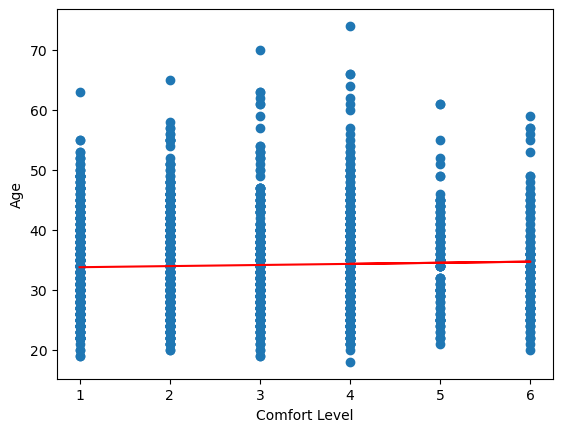

In [5]:
# 
x_values = regress_df['comfort_level']
y_values = regress_df['age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Comfort Level')
plt.ylabel('Age')

# Save an image of the chart in Resources
plt.savefig("Figures/age_discuss_effect.png")

print(f"The r value is: {rvalue}")
plt.show()

In [6]:
regress_df['employer_discuss_mh'].unique()

array(['No', 'Yes', "I don't know"], dtype=object)

In [7]:
##########################  
###
###   Set up and experiment with chi
###
##########################

In [8]:
chi_yes_df = regress_df.loc[regress_df['employer_discuss_mh'] == 'Yes']
chi_yes_df.head()

,age,employer_discuss_mh,request_med_leave,year,comfort_level
1,29.0,Yes,Somewhat easy,2016,2
10,28.0,Yes,Very easy,2016,1
13,44.0,Yes,Somewhat easy,2016,2
21,35.0,Yes,Somewhat easy,2016,2
28,34.0,Yes,Neither easy nor difficult,2016,3


In [9]:
chi_yes_df['comfort_level'].value_counts()

comfort_level
2    192
1    172
3     73
4     60
5     14
6     10
Name: count, dtype: int64

In [10]:
chi_no_idk_df = regress_df.loc[regress_df['employer_discuss_mh'] != 'Yes']
chi_no_idk_df.head()
mode = chi_no_idk_df['comfort_level'].mode()
mode

0    2
Name: comfort_level, dtype: int64

In [11]:
chi_no_idk_df['comfort_level'].value_counts()

comfort_level
2    443
1    333
4    297
3    271
6    108
5     98
Name: count, dtype: int64

In [12]:
#len(chi_no_idk_df)
no_idk_observed = [333, 443, 271, 297, 98, 108]
#len(chi_yes_df)
yes_observed = [172, 192, 73, 60, 14, 10]

observed = yes_observed
# expected is based on a hypothesis of comfort level distribution of [20%,50%,15%,8%,5%,2%]
expected = [104, 262, 78, 41, 26, 10]

df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = expected

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
0,172,104
1,192,262
2,73,78
3,60,41
4,14,26
5,10,10


In [13]:
# With 6 rows, the degree of freedom is 6-1 = 5
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 5)

# The critical value
critical_value

11.070497693516351

In [14]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=77.82768094562918, pvalue=2.388274739827565e-15)

In [15]:
##########################  
###
###   Chart Employer Discussing MH vs Comfort with Requesting Leave
###
##########################

In [16]:
chi_no_idk_df = regress_df.loc[regress_df['employer_discuss_mh'] != 'Yes']
chi_yes_df.head()

,age,employer_discuss_mh,request_med_leave,year,comfort_level
1,29.0,Yes,Somewhat easy,2016,2
10,28.0,Yes,Very easy,2016,1
13,44.0,Yes,Somewhat easy,2016,2
21,35.0,Yes,Somewhat easy,2016,2
28,34.0,Yes,Neither easy nor difficult,2016,3


In [17]:
yes_list = yes_observed
no_idk_list = no_idk_observed 
chi_yes_mean = chi_yes_df["comfort_level"].mean()
chi_yes_mean
chi_no_idk_mean = chi_no_idk_df["comfort_level"].mean()

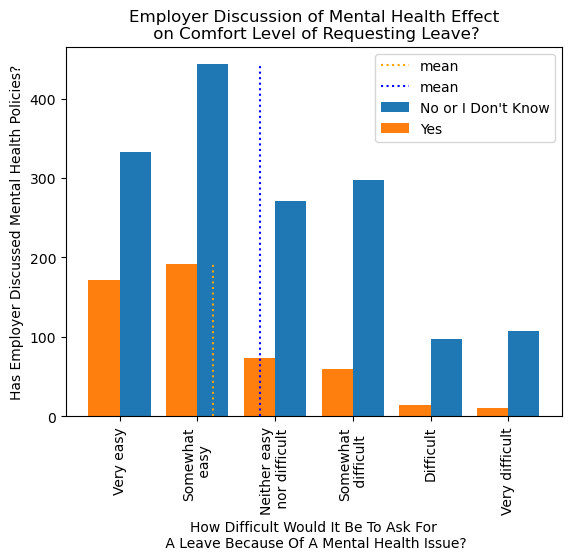

In [18]:
answers = ['Very easy','Somewhat\n easy','Neither easy\n nor difficult','Somewhat\n difficult','Difficult','Very difficult']

x_axis = np.arange(len(answers))

plt.bar(x_axis + 0.2, no_idk_list, 0.4, label = "No or I Don't Know") 
plt.bar(x_axis - 0.2, yes_list, 0.4, label = 'Yes') 

plt.xticks(x_axis, answers, rotation='vertical') 
plt.title("Employer Discussion of Mental Health Effect\n on Comfort Level of Requesting Leave?")
plt.xlabel("How Difficult Would It Be To Ask For\n A Leave Because Of A Mental Health Issue?")
plt.ylabel("Has Employer Discussed Mental Health Policies?")
plt.vlines(x = chi_yes_mean-1, ymin = 0, ymax = max(yes_list), color = 'orange', linestyle = ':', label = "mean")
plt.vlines(x = chi_no_idk_mean-1, ymin = 0, ymax = max(no_idk_list), color = 'blue', linestyle = ':', label = "mean")
plt.legend()

# Save an image of the chart in Resources
plt.savefig("Figures/employer_discuss_effect.png")

plt.show()

In [19]:
per_year_yes_mean = chi_yes_df.groupby("year")["comfort_level"].mean()
per_year_yes_mean

year
2016    2.260870
2017    2.137681
2018    1.988889
2019    2.360465
Name: comfort_level, dtype: float64

In [20]:
per_year_noidk_mean = chi_no_idk_df.groupby("year")["comfort_level"].mean()
per_year_noidk_mean

year
2016    2.982188
2017    2.630000
2018    2.743719
2019    2.521212
Name: comfort_level, dtype: float64